In [2]:
import pandas as pd
import numpy as np
import cv2, os
import scipy
from scipy import signal
import csv
import matplotlib.pyplot as plt

In [3]:
circle_color, line_color = (255,255,0), (0,0,255)
window_length, polyorder = 13, 2
sd = "weightlift-trim"
input_source = "/home/suprnrdy/workspace/weightlift" + sd + '.mp4'

In [4]:
cap = cv2.VideoCapture(input_source)
hw = 720
out = cv2.VideoWriter('/home/suprnrdy/workspace/weightlift/smooth_pose.avi',
                      cv2.VideoWriter_fourcc('M','J','P','G'), 30, (hw,hw))

In [5]:
# This converts the flattened dataframe back to (n,25,3) array with n being the number of 
# frames, 25 being the pose points, and 3 being x,y,probability for each pose joint.
# Get pose data - data is generated by OpenPose
df = pd.read_csv('/home/suprnrdy/workspace/weightlift/cleanandjerk.csv')
posedata = np.array(df.values.reshape(df.shape[0],25,3))
posedata.shape

(1305, 25, 3)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,268.629242,146.692337,0.903268,339.974487,242.581085,0.768271,298.257446,244.255966,0.798398,301.761566,...,0.148456,298.246552,583.777405,0.489597,299.932800,578.593933,0.448608,397.553467,564.626160,0.445479
1,268.664062,145.046204,0.904204,339.973175,242.562088,0.766197,298.259491,244.226593,0.798119,301.734375,...,0.147836,298.247589,583.772644,0.483101,299.933472,578.594727,0.441915,397.560425,564.618652,0.446252
2,270.280884,145.004288,0.912309,339.967926,242.526230,0.760687,298.252686,244.210571,0.799152,301.735138,...,0.145986,298.251709,583.775391,0.482812,299.934662,578.593079,0.441772,397.557922,564.600159,0.458429
3,270.340424,144.923492,0.907471,339.977051,242.550507,0.765996,298.254791,244.193161,0.798388,301.754089,...,0.145027,298.236145,583.770752,0.483230,298.273773,578.608948,0.444314,397.530884,562.867310,0.481085
4,270.396088,143.289993,0.905794,339.989227,242.566101,0.766802,298.263855,242.564377,0.797888,301.765503,...,0.145475,298.219849,583.772400,0.493106,298.266083,578.609802,0.454859,397.492310,562.895447,0.484242


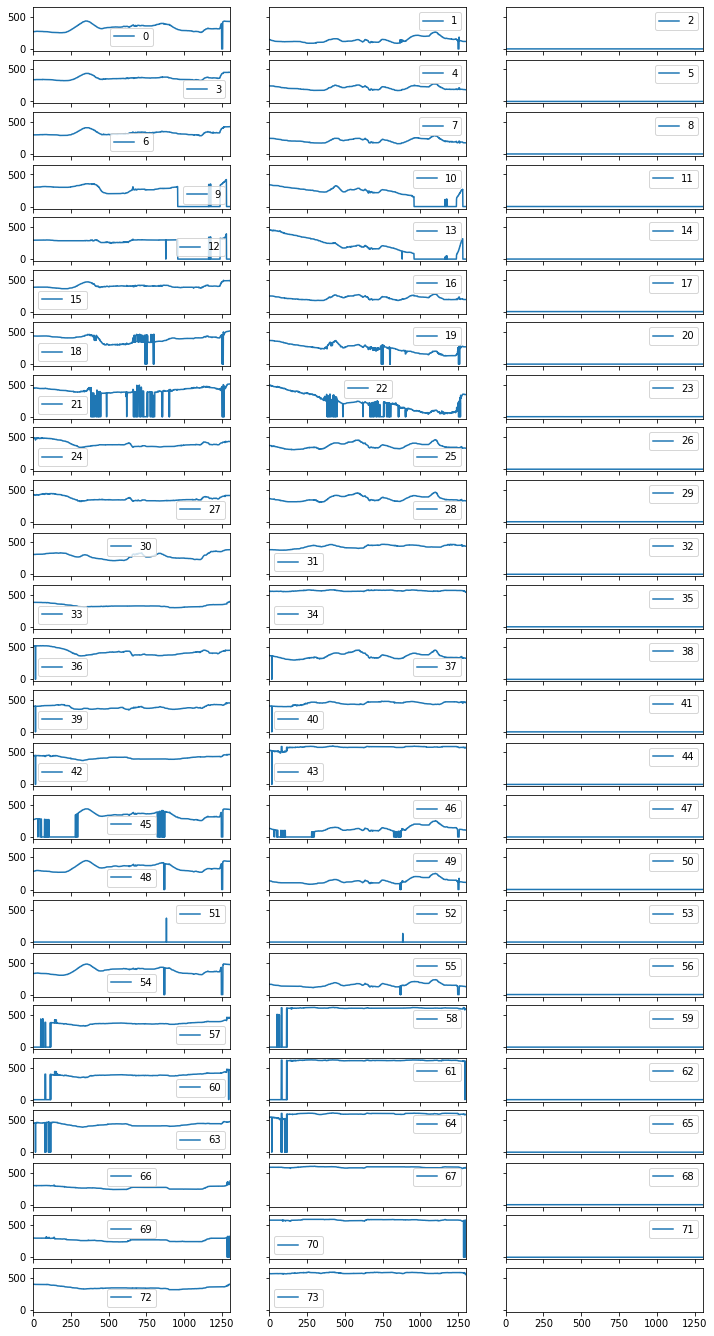

In [7]:
fig,axes = plt.subplots(nrows=25, ncols=3, sharex=True, sharey=True, figsize=(12,24))
r = 0
c = 0
for col in (df.index):
    if col is 74:
        break
    df.plot(kind='line', y=col, ax=axes[r][c])
    r = int((col+1)/3)
    c = (col+1)%3

In [8]:
df2 = df.copy()
for i in range(74): df2[str(i)] = signal.savgol_filter(df2[str(i)], window_length, polyorder)


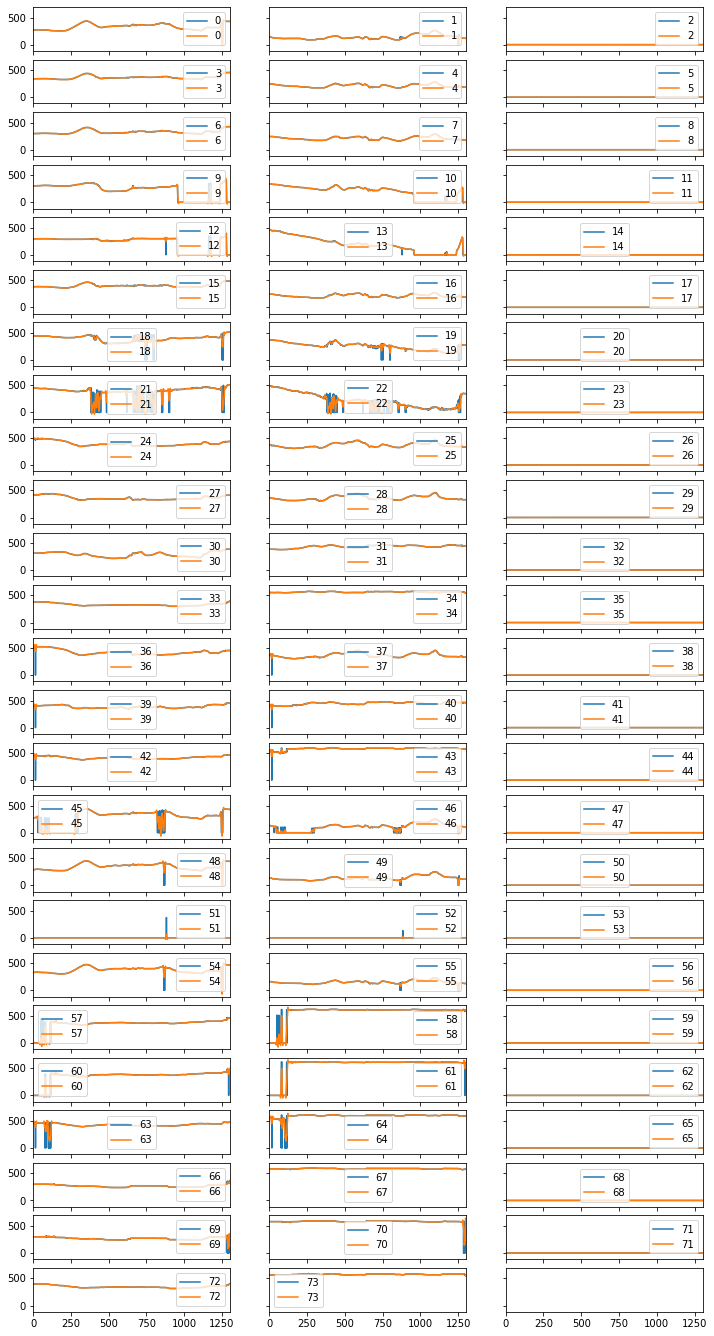

In [9]:
fig,axes = plt.subplots(nrows=25, ncols=3, sharex=True, sharey=True, figsize=(12,24))
r = 0
c = 0
for col in (df.index):
    if col is 74:
        break
    df.plot(kind='line', y=col, ax=axes[r][c])
    df2.plot(kind='line', y=col, ax=axes[r][c])
    r = int((col+1)/3)
    c = (col+1)%3

In [10]:
# //     {0,  "Nose"},
# //     {1,  "Neck"},
# //     {2,  "RShoulder"},
# //     {3,  "RElbow"},
# //     {4,  "RWrist"},
# //     {5,  "LShoulder"},
# //     {6,  "LElbow"},
# //     {7,  "LWrist"},
# //     {8,  "MidHip"},
# //     {9,  "RHip"},
# //     {10, "RKnee"},
# //     {11, "RAnkle"},
# //     {12, "LHip"},
# //     {13, "LKnee"},
# //     {14, "LAnkle"},
# //     {15, "REye"},
# //     {16, "LEye"},
# //     {17, "REar"},
# //     {18, "LEar"},
# //     {19, "LBigToe"},
# //     {20, "LSmallToe"},
# //     {21, "LHeel"},
# //     {22, "RBigToe"},
# //     {23, "RSmallToe"},
# //     {24, "RHeel"},
# //     {25, "Background"}
# OLD PAIRING There are 15 points in the skeleton
# pairs = [[0,1], # head
#          [1,2],[1,5], # sholders
#          [2,3],[3,4],[5,6],[6,7], # arms
#          [1,14],[14,11],[14,8], # hips
#          [8,9],[9,10],[11,12],[12,13]] # legs

# NEW PAIRING There are 26 points in the skeleton
pairs = [[17,15],[15,0],[16,0],[16,18], #head
         [0,1], #neck
         [1,2],[1,5], #shoulders
         [2,3],[3,4],[5,6],[6,7], #arms
         [1,8], #core
         [8,9],[8,12], #hips
         [9,10],[10,11],[11,22],[11,24],[22,23], #leftleg
         [12,13],[13,14],[14,19],[14,21],[19,20] #rightleg
        ]

In [24]:
# Redo this whole section to draw the skeleton!!


# frame_number = 0
# while True:
#     print(frame_number)
#     ret, img = cap.read()
#     if not ret: break
#     #img = np.zeros_like(img)        
#     values = np.array(df.values[frame_number], int)
    
#     points, lateral_offset = [], 18
#     points = list(zip(values[:26]+lateral_offset, values[26:]))

#     cc = 0
#     for point in points:
#         cc += 90
#         xy = tuple(np.array([point[0], point[1]], int))
#         cv2.circle(img, xy, 5, (cc,cc,cc), 5)

#     # Draw Skeleton
#     for pair in pairs:
#         partA = pair[0]
#         partB = pair[1]
#         cv2.line(img, points[partA], points[partB], line_color, 3, lineType=cv2.LINE_AA)
    
#     cv2.imshow('Output-Skeleton', img)
#     k = cv2.waitKey(100)
#     if k == 27: break
#     out.write(img)
#     frame_number+=1
# cv2.destroyAllWindows()

values = np.array(df.values[200], int)
print(values)
# points, lateral_offset = [], 18
# points = list(zip(values[:26], values[26:]))
# points
print(values[::])


[254 115   0 324 195   0 289 200   0 299 275   0 285 354   0 355 190   0
 411 291   0 411 378   0 441 312   0 409 313   0 329 399   0 352 566   0
 475 310   0 423 414   0 423 582   0   0   0   0 268 104   0   0   0   0
 301 130   0 362 611   0 374 615   0 439 602   0 282 585   0 286 580   0
 366 578   0]
[254 324 289 299 285 355 411 411 441 409 329 352 475 423 423   0 268   0
 301 362 374 439 282 286 366]
